<a href="https://colab.research.google.com/github/fabricioeirim/Deployment/blob/main/Analise_Gr%C3%A1fica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd

In [72]:
df1=pd.read_excel("/content/Aracaju.xlsx")
df2=pd.read_excel("/content/Fortaleza.xlsx")
df3=pd.read_excel("/content/Natal.xlsx")
df4=pd.read_excel("/content/Recife.xlsx")
df5=pd.read_excel("/content/Salvador.xlsx")

In [73]:
df1.head(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [74]:
df=pd.concat([df1,df2,df3,df4,df5])

In [75]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [76]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [77]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [78]:
df["LojaID"] = df["LojaID"].astype ("object")

In [79]:
df.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [80]:
df.isnull().sum()


Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [81]:
df["Receita"]=df["Vendas"].mul(df["Qtde"])

In [82]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [83]:
df["Receita"].max()

3544.0

In [84]:
df["Receita"].min()

3.34

In [85]:
df["Receita"].mean()

387.49774049217

In [86]:
#Esse método retorna o TOP "5" melhores receitas.
df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [87]:
#Esse método retorna o TOP "5" piores receitas.
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [88]:
#Método retorna o agrupamento de receita x cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [89]:
from pickle import FALSE
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [90]:
df["Data"]=df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [91]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [92]:
df["Data"]=pd.to_datetime(df["Data"])

In [93]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [94]:
df["Ano_Venda"]=df["Data"].dt.year

In [95]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [96]:
df["Mes_venda"], df["Dia_venda"]=(df["Data"].dt.month, df["Data"].dt.day)

In [97]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3


In [98]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [99]:
df["diferença_dias_venda"]=df["Data"]-df["Data"].min()

In [100]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,diferença_dias_venda
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days


In [101]:
df["trimestre_vendas"]=df["Data"].dt.quarter

In [102]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,diferença_dias_venda,trimestre_vendas
225,Natal,2019-01-02,36.23,1035,1,36.23,2019,1,2,366 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days,1
14,Salvador,2019-01-12,109.01,1035,2,218.02,2019,1,12,376 days,1
86,Natal,2019-01-02,156.47,1037,3,469.41,2019,1,2,366 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
107,Salvador,2019-01-01,14.70,1035,1,14.70,2019,1,1,365 days,1
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2018,1,1,0 days,1
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,2,8,403 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1


In [103]:
verdas_marco_2019=df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [104]:
verdas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,diferença_dias_venda,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [105]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

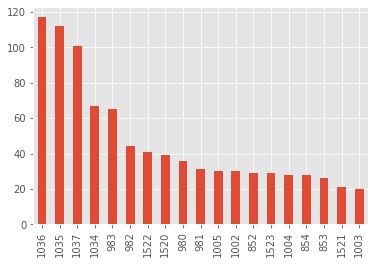

In [106]:
df["LojaID"].value_counts(ascending=False).plot.bar()

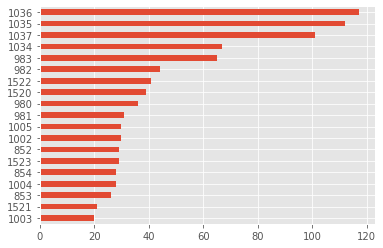

In [107]:
df["LojaID"].value_counts(ascending=True).plot.barh();

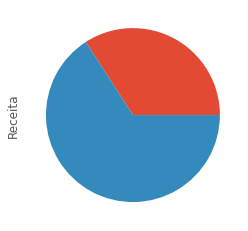

In [108]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();


In [109]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

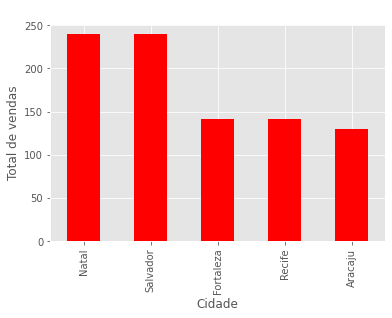

In [116]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas Por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [111]:
plt.style.use("ggplot")

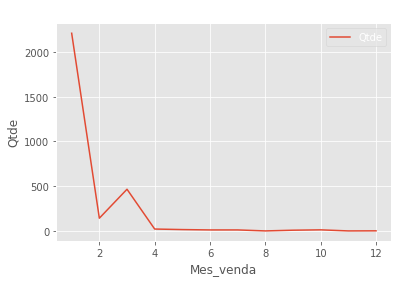

In [152]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title='Total de Produtos x Mês')
plt.xlabel("Mes_venda")
plt.ylabel("Qtde")
plt.legend();


In [118]:
df.groupby (df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [120]:
df_2019=df[df["Ano_Venda"] == 2019]

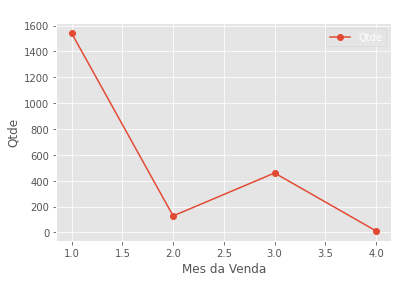

In [151]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(title = 'Vendas 2019', marker = "o")
plt.xlabel("Mes da Venda")
plt.legend()
plt.ylabel("Qtde");

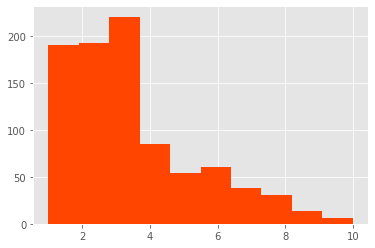

In [135]:
plt.hist(df["Qtde"], color = "orangered");

Text(0.5, 1.0, 'Dia x Receita')

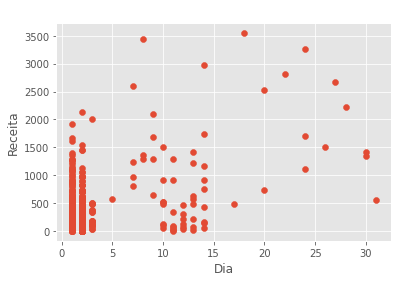

In [150]:
plt.scatter(x=df_2019["Dia_venda"], y=df_2019["Receita"])
plt.xlabel("Dia")
plt.ylabel("Receita");
plt.title("Dia x Receita")

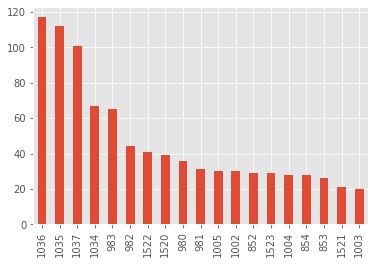

In [161]:
df["LojaID"].value_counts(ascending=False).plot.bar()
plt.savefig("QTD x Loja.png")

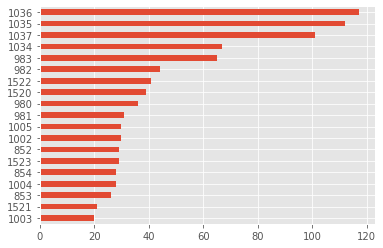

In [162]:
df["LojaID"].value_counts(ascending=True).plot.barh();
plt.savefig("QTD x Loja x horizontal.png")

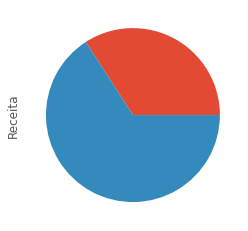

In [163]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();
plt.savefig("receita x ano.png")

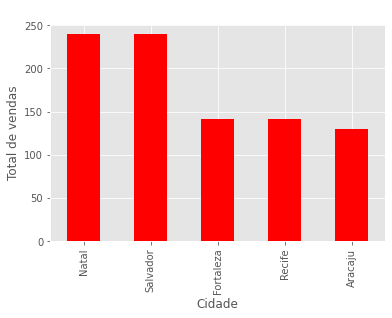

In [164]:
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas Por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");
plt.savefig("Qtde vendas x cidade.png")

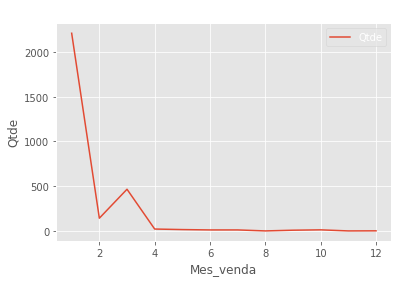

In [165]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title='Total de Produtos x Mês')
plt.xlabel("Mes_venda")
plt.ylabel("Qtde")
plt.legend();
plt.savefig("QTD x Mes.png")

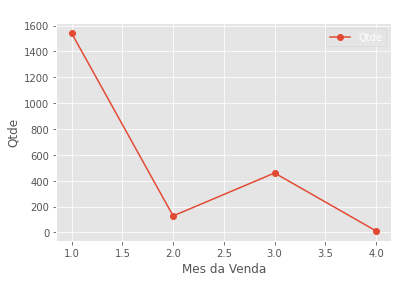

In [166]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(title = 'Vendas 2019', marker = "o")
plt.xlabel("Mes da Venda")
plt.legend()
plt.ylabel("Qtde");
plt.savefig("QTD x Mes_ano_2019.png")

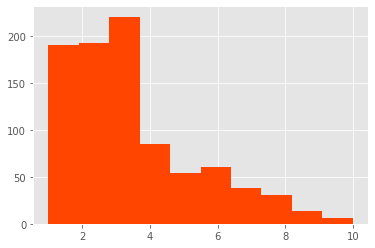

In [167]:
plt.hist(df["Qtde"], color = "orangered");
plt.savefig("Histograma _ Qtde.png")


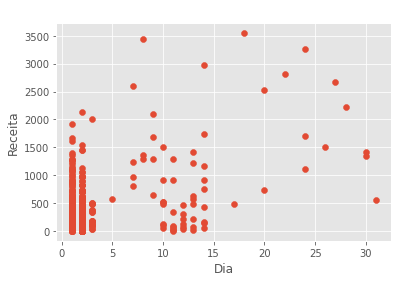

In [168]:
plt.scatter(x=df_2019["Dia_venda"], y=df_2019["Receita"])
plt.xlabel("Dia")
plt.ylabel("Receita");
plt.title("Dia x Receita")
plt.savefig("Grafico disperção _ DIA x Receita ano 2019.png")